In [1]:
#import tensorflow as tf
#import tensorflow_hub as hub
#import tensorflow_text
#import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
#import pandas as pd
#import numpy as np
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
import seaborn as sn
from matplotlib import pyplot as plt

from datasets import load_dataset
dataset = load_dataset("tasksource/crowdflower" , "text_emotion")

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labeluri = {
    "0": "sadness",
    "1": "empty",
	"2": "relief",
	"3": "hate",
	"4": "worry",
	"5": "enthusiasm",
	"6": "happiness",
	"7": "neutral",
	"8": "love",
	"9": "fun",
	"10": "anger",
	"11": "surprise",
    "12": "boredom"
}
for i in range(0,13):
	print(labeluri[str(i)],":  ",dataset["train"]["label"].count(i))

sadness :   5165
empty :   827
relief :   1526
hate :   1323
worry :   8457
enthusiasm :   759
happiness :   5209
neutral :   8638
love :   3842
fun :   1776
anger :   110
surprise :   2187
boredom :   179


In [3]:
date_X = dataset["train"]["text"]
date_Y = dataset["train"]["label"]

In [4]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
#sbert_model = SentenceTransformer('all-mpnet-base-v2')

data_X_embeded = sbert_model.encode(date_X)

c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\RoscaMitrut\.conda\envs\tfgpu\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_X_embeded, date_Y, test_size=0.2)

In [8]:
classifiers = []
for i in range(15,16):#(0,30)
	classifier = KNeighborsClassifier(n_neighbors=i, p=13, metric='euclidean')
	classifier.fit(X_train,y_train)
	classifiers.append(classifier)
	classifier = KNeighborsClassifier(n_neighbors=i, p=13, metric='cosine')
	classifier.fit(X_train,y_train)
	classifiers.append(classifier)

In [9]:
for model in classifiers:
    pred = model.predict(X_test)
    print(f"acc {model.n_neighbors}/{model.metric}: ",accuracy_score(y_test,pred))

acc 15/euclidean:  0.327
acc 15/cosine:  0.3285


acc:  0.327
f1:  [0.29584352 0.         0.04155844 0.14973262 0.38128951 0.
 0.35584843 0.42170963 0.34487535 0.02067183 0.         0.00404858
 0.        ]


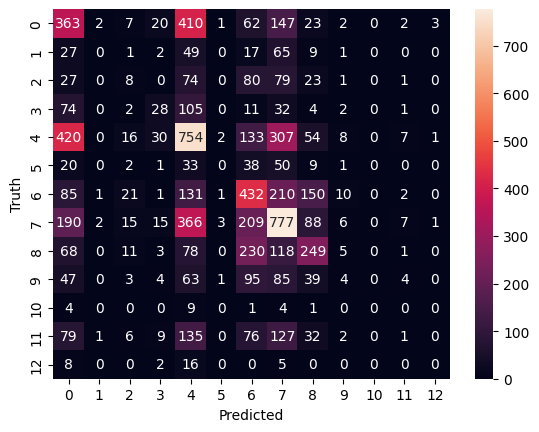

In [10]:
predicted = classifiers[0].predict(X_test)

print("acc: ", accuracy_score(y_test, predicted))
print("f1: ",f1_score(y_test, predicted,average=None))

cm = confusion_matrix(y_test,predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()